In [1]:
import Access_Keys

In [2]:
URL = 'http://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv'

In [5]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Binance_BTCUSDT_d.csv')

('Binance_BTCUSDT_d.csv', <http.client.HTTPMessage at 0x20663802fc8>)

In [6]:
import pandas as pd
import numpy as np

In [35]:
data = pd.read_csv('Binance_BTCUSDT_d.csv',skiprows=1,parse_dates=False,usecols=['date','open','close','high','low'])
data.head()

,date,open,high,low,close
0,2021-04-30 00:00:00,53555.00,53623.00,53482.20,53620.63
1,2021-04-29 00:00:00,54846.23,55195.84,52330.94,53555.00
2,2021-04-28 00:00:00,55011.97,56428.00,53813.16,54846.22
3,2021-04-27 00:00:00,54001.38,55460.00,53222.00,55011.97
4,2021-04-26 00:00:00,49066.76,54356.62,48753.44,54001.39


In [36]:
data.tail()

,date,open,high,low,close
1349,2017-08-21,4086.29,4119.62,3911.79,4016.00
1350,2017-08-20,4139.98,4211.08,4032.62,4086.29
1351,2017-08-19,4108.37,4184.69,3850.00,4139.98
1352,2017-08-18,4285.08,4371.52,3938.77,4108.37
1353,2017-08-17,4469.93,4485.39,4200.74,4285.08


In [37]:
# len() = 19 for yyyy-mm-dd 00:00:00 format
# len() = 10 for yyyy-mm-dd
# add 00:00:00 to these to make it uniform

replacement_indices = []
for i in range(len(data['date'])):
    if len(data['date'][i]) != 19:
        if len(data['date'][i]) == 10:
            replacement_indices.append(i)
        else:
            print(i) # Any unexpected lengths

[1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353]


In [38]:
# iloc uses integer indices only, so I use the index of 'date' coulmn, which is 0
data.iloc[replacement_indices, 0] = data.iloc[replacement_indices, 0] + ' 00:00:00'

In [39]:
data.tail()

,date,open,high,low,close
1349,2017-08-21 00:00:00,4086.29,4119.62,3911.79,4016.00
1350,2017-08-20 00:00:00,4139.98,4211.08,4032.62,4086.29
1351,2017-08-19 00:00:00,4108.37,4184.69,3850.00,4139.98
1352,2017-08-18 00:00:00,4285.08,4371.52,3938.77,4108.37
1353,2017-08-17 00:00:00,4469.93,4485.39,4200.74,4285.08


In [15]:
data['date'][1244]

'2017-12-04'

In [42]:
#convert date to unix time to compare with openblender data
data['timestamp'] = OpenBlender.dateToUnix(data['date'], 
                                           date_format = '%Y-%m-%d %H:%M:%S', 
                                           timezone = 'GMT')

In [43]:
data.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
timestamp    float64
dtype: object

<AxesSubplot:xlabel='timestamp'>

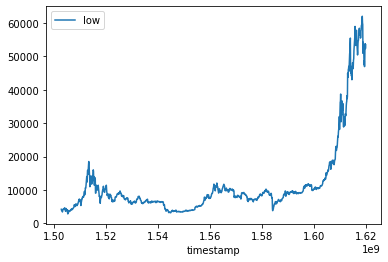

In [50]:
data.plot(x='timestamp',y='low')

%pip install OpenBlender

In [41]:
# The following code is from https://towardsdatascience.com/what-moves-bitcoin-c06f7b46d2e4
# with my user tokens

import OpenBlender

In [51]:
import json

In [6]:
OpenBlender_api_token = Access_Keys.OpenBlender_api_token;

List of sources used (Both Headline and title were used):

Daily news headlines of NDTV Technology
Daily news headlines of Mirror Technology
Daily news headlines of Daily Telegraph Technology
Daily news headlines of ABC News  International Technology
Daily news headlines of Standard Technology
Fox News Technology News daily headlines

In [ ]:
action = 'API_getDataWithVectorizer'
parameters = {
        'token': OpenBlender_api_token,
        'id_textVectorizer':'5e668f9b951629532cebb48a',
        'aggregate_in_time_interval': {'time_interval_size': 86400},
        'omit_vectorizer': 0,
        'add_date': 'date'
      }
response = OpenBlender.call(action, parameters)

In [ ]:
df = pd.read_json(json.dumps(response['sample'])
                  ,convert_dates=True,
                  convert_axes=False)
df.sort_values('timestamp', ascending=False)
df.head()

import getpass

In [ ]:
# Now, let's search on OpenBlender
search_keyword = 'technology'
df = df.sort_values('timestamp').reset_index(drop = True)
print('From : ' + OpenBlender.unixToDate(min(data.timestamp)))
print('Until: ' + OpenBlender.unixToDate(max(data.timestamp)))
# Pass timestamp column and search keywords as parameters
OpenBlender.searchTimeBlends(OpenBlender_api_token, data.timestamp, search_keyword)

From : 17-08-2017 00:00:00
Until: 02-02-2021 00:00:00


[{'description': 'NPR Science News daily headlines',
  'features': ['headline', 'publisher', 'timestamp', 'title', 'url'],
  'id_dataset': '5d57204d9516293a12ad4f70',
  'intersection': '100%',
  'name': 'NPR Science News',
  'num_observations': 1924,
  'url': 'https://www.openblender.io/#/dataset/explore/5d57204d9516293a12ad4f70'},
 {'description': 'NPR Technology News daily headlines',
  'features': ['headline', 'publisher', 'timestamp', 'title', 'url'],
  'id_dataset': '5d5ab4259516296e5749de83',
  'intersection': '100%',
  'name': 'NPR Technology News',
  'num_observations': 1653,
  'url': 'https://www.openblender.io/#/dataset/explore/5d5ab4259516296e5749de83'},
 {'description': 'Daily news headlines of The Independent Technology',
  'features': ['headline', 'publisher', 'timestamp', 'title', 'url'],
  'id_dataset': '5d86608c9516296ba7e6a437',
  'intersection': '100%',
  'name': 'The Independent Technology headlines',
  'num_observations': 4248,
  'url': 'https://www.openblender.io/

In [ ]:
id_list = ['5d5ab15c9516296e5749de7a',# Buissness insider Technology news
           ]

In [ ]:
action = 'API_getObservationsFromDataset'

parameters = {
        'token':OpenBlender_api_token,
        'id_dataset': '5d5ab15c9516296e5749de7a',
        # 'date_filter': {'start_date': '2020-08-17','end_date': '2020-08-20'},
        'drop_features': ['url','publisher']
      }

In [ ]:
response = OpenBlender.call(action, parameters)

Task ID: '602d24640895fafb4a9d8d4b'.
Total estimated consumption: 500.6 processing units.
Task confirmed. Starting download..
3.45 %
6.9 %
10.34 %
13.79 %
17.24 %
20.69 %
24.14 %
27.59 %
31.03 %
34.48 %
37.93 %
41.38 %
44.83 %
48.28 %
51.72 %
55.17 %
58.62 %
62.07 %
65.52 %
68.97 %
72.41 %
75.86 %
79.31 %
82.76 %
86.21 %
89.66 %
93.1 %
96.55 %
100.0 % completed.


In [ ]:
df = pd.read_json(json.dumps(response['sample'])
                  ,convert_dates=True,
                  convert_axes=False)
df.sort_values('timestamp', ascending=False)
df.head()

,headline,timestamp,title
0,The firm has thus far inked Showcase deals wit...,2021-02-17 11:53:59,Google is reportedly close to a $30 million an...
1,TikTok breaches consumer rights by misleading ...,2021-02-17 11:26:50,TikTok breaches users' rights and fails to pro...
2,"""Fortnite"" developer Epic Games said in an EU ...",2021-02-17 10:27:04,'Fortnite' maker Epic Games is taking its war ...
3,Jeff Bezos. Drew Angerer/Getty Images Jeff Be...,2021-02-17 10:12:02,Jeff Bezos has taken back the title of the wor...
4,,2021-02-17 08:03:22,10 things in tech you need to know today


In [ ]:
df.shape

(8610, 3)

In [ ]:
df[df['title'].str.contains("bitcoin|Bitcoin")].shape

(27, 3)

action = 'API_createTextVectorizer'
 # Buissness insider id: 60195cdc951629710cbdba95f8RXtKeDpukuavetT1zyFlCtr86NKI
vectorizer_parameters = {
    'token' : OpenBlender_api_token,
    'name' : 'News Headlines',
    'anchor':{'id_dataset' : '5d5ab15c9516296e5749de7a', 'include_features' : ['title']},
    'ngram_range' : {'min' : 1, 'max' : 2},
    'language' : 'en',
    'remove_stop_words' : 'on',
    'min_count_limit' : 2
}

parameters = { 
   'token': OpenBlender_api_token ,
   'id_dataset':'5d5ab15c9516296e5749de7a',
   'target_threshold' : {'feature':'change','success_thr_over':0},
   'lag_target_feature' : {'feature':'change_over_0', 'periods':1},
   'blends':[{'id_blend':'5de020789516293a833f5818',
               'blend_type' : 'text_ts',
               'restriction' : 'predictive',
               'blend_class' : 'closest_observation', 
               'specifications':{'time_interval_size' : 3600*12 }}],
   'date_filter':{'start_date':'2017-08-20T16:59:35.825Z',
                   'end_date':'2021-02-2T17:59:35.825Z'},
   'drop_non_numeric' : 1
}

def pullObservationsToDF(parameters):
    action = 'API_getObservationsFromDataset'
    df = pd.read_json(json.dumps(OpenBlender.call(action,parameters)['sample'])
                    ,convert_dates=False,convert_axes=False).sort_values('timestamp', ascending=False)
    df.reset_index(drop=True, inplace=True)
    return df
df = pullObservationsToDF(parameters)